In [1]:
import warnings
warnings.filterwarnings('ignore')
from classes.siamese_model import EmbeddingTrainer, EmbeddingsModel


from tqdm import tqdm
from functools import partialmethod
tqdm.__init__ = partialmethod(tqdm.__init__, disable=True)

In [18]:
all_subjects = ['S001', 'S002', 'S003', 'S004', 'S005', 'S006', 'S007', 'S008',
                'S009', 'S010', 'S011', 'S012', 'S013', 'S014', 'S015', 'S016',
                'S017', 'S018', 'S019', 'S020', 'S021', 'S022', 'S023', 'S024',
                'S025', 'S026', 'S027', 'S029', 'S031', 'S032', 'S033', 'S034',
                'S035', 'S036', 'S037', 'S038', 'S039', 'S040', 'S041', 'S042',
                'S043', 'S044', 'S045', 'S046', 'S047', 'S048', 'S049', 'S050',
                'S051', 'S052', 'S053', 'S054', 'S055', 'S056', 'S057', 'S058',
                'S060', 'S061', 'S062', 'S063', 'S064', 'S065', 'S066', 'S067',
                'S068', 'S069', 'S070', 'S071', 'S072', 'S073', 'S074', 'S075',
                'S076', 'S077', 'S078', 'S079', 'S080', 'S081', 'S082', 'S083',
                'S084', 'S085', 'S086', 'S087', 'S088', 'S089', 'S090', 'S091',
                'S092', 'S093', 'S094', 'S095', 'S096', 'S097', 'S098', 'S099',
                'S100', 'S101', 'S102', 'S103', 'S104', 'S105', 'S106', 'S107',
                'S109', 'S110', 'S111', 'S112', 'S113', 'S114', 'S115', 'S116',
                'S117', 'S118', 'S119', 'S120', 'S121', 'S122', 'S123', 'S124',
                'S125', 'S126', 'S127', 'S128', 'S129', 'S130', 'S131', 'S132',
                'S133', 'S134']
subjects_test = [all_subjects[0]]
subjects_train = [sub for sub in all_subjects if sub not in subjects_test]

In [19]:
trainer_hyperparameter = {
    "path_train": "D:\Workspace\workspace_masterarbeit\PainLevelShiftDetection\FeatureGeneration\dataset_processed\XITE\\normalized_subjects.pkl",
    "subjects_train": subjects_train,
    "path_test": "D:\Workspace\workspace_masterarbeit\PainLevelShiftDetection\FeatureGeneration\dataset_processed\XITE\\normalized_subjects.pkl",
    "subjects_test": subjects_test,
    "wandb": False,
    "acc_in_loop": True,
    "learning_rate": 0.001,
    "batch_size": 256,
    "margin": 0.03057,
    "distance": 0,
    "filter": None
}

model_hyperparameter = {
    "sigmoid": True,
    "dropout": 0.2,
    "fc1": 1024,
    "fc2": 1024,
    "fc3": 512,
}

model = EmbeddingsModel(model_hyperparameter)        
trainer = EmbeddingTrainer(trainer_hyperparameter, model, device="cuda:0")

In [20]:
history = trainer.trainloop(5)

0.845108695652174
0.8668478260869565
0.875
0.8668478260869565
0.8695652173913043


In [21]:
acc = trainer.test_accuracy()
print("accuracy:", acc)

accuracy: 0.8695652173913043


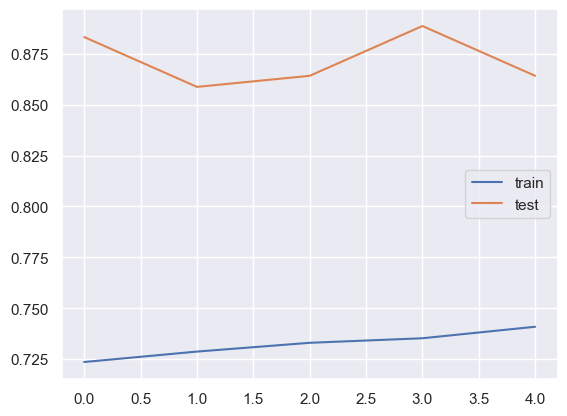

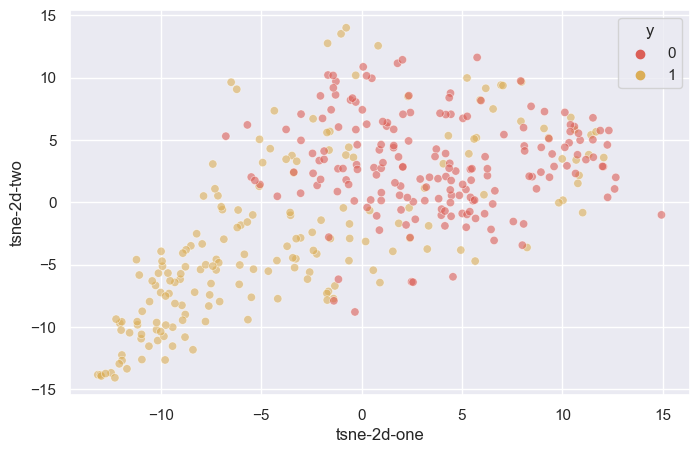

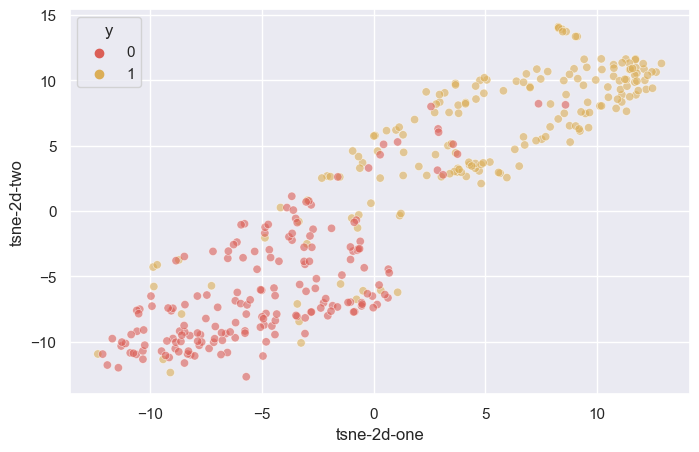

In [22]:
trainer.plot_history(history)
trainer.display_embeddings(use_model=False)
trainer.display_embeddings(use_model=True)